# 1. Pengenalan

Nama    : Muhammad Fiqih Al-ayubi
Konteks : Data Transformation and Analysis


# 2. Import Libraries

In [795]:
# Import tools dasar
import pandas as pd
import numpy as np
from scipy import stats

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 3. Load Dataset

In [796]:
# Setting display
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('ecommerce-session-bigquery.csv')

In [797]:
# Cek hasil
df.head(10)

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productRefundAmount,productQuantity,productPrice,productRevenue,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,20170721,1500643403,PAGE,NaN,NaN,0,NaN,9180781,Suitcase Organizer Cubes,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,20170413,1492114470,PAGE,NaN,NaN,0,NaN,9180793,26 oz Double Wall Insulated Bottle,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,20170727,1501198444,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,20170731,1501522359,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,20170728,1501300311,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
5,1371078687799372953,Referral,478901,United States,Ann Arbor,67570000.0,1.0,1569.0,48.0,87.0,20170726,1501111386,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
6,8781227467221587011,Referral,119567,United States,Mountain View,24710000.0,1.0,1007.0,35.0,71.0,20170727,1501203918,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
7,7328657227470299189,Organic Search,1115991,India,not available in demo dataset,NaN,NaN,3326.0,41.0,NaN,20170305,1488700723,PAGE,NaN,NaN,0,NaN,9180842,Maze Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
8,603507101721972238,Referral,63158,United States,not available in demo dataset,NaN,NaN,372.0,20.0,NaN,20170323,1490286223,PAGE,NaN,NaN,0,NaN,9180844,Gunmetal Roller Ball Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
9,2410100047658323318,Direct,487916,New Zealand,not available in demo dataset,NaN,NaN,488.0,6.0,NaN,20170306,1488836135,PAGE,NaN,NaN,0,NaN,9180844,Gunmetal Roller Ball Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


In [798]:
# Cek hasil
df.tail(10)

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productRefundAmount,productQuantity,productPrice,productRevenue,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
9990,8160942479431419810,Organic Search,8679,United States,Austin,NaN,NaN,3184.0,80.0,NaN,20160802,1470167099,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9991,9622176459647341592,Direct,0,Germany,not available in demo dataset,NaN,NaN,134.0,7.0,NaN,20160826,1472220074,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9992,262583177454569381,Paid Search,177116,United States,not available in demo dataset,NaN,NaN,409.0,12.0,NaN,20160915,1474000554,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9993,2103516610461663217,Organic Search,50737,United States,Los Angeles,NaN,NaN,104.0,5.0,NaN,20160804,1470334585,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9994,4820449943911812081,Organic Search,49957,Japan,not available in demo dataset,NaN,NaN,122.0,8.0,NaN,20160807,1470638891,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,NaN,NaN,561.0,18.0,NaN,20160809,1470768035,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,NaN,NaN,365.0,7.0,NaN,20161005,1475679617,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,NaN,NaN,107.0,7.0,NaN,20160901,1472737682,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,NaN,NaN,93.0,11.0,NaN,20160929,1475183739,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9999,4307804717807925609,Organic Search,407285,United States,not available in demo dataset,NaN,NaN,455.0,21.0,NaN,20160904,1473041497,PAGE,NaN,NaN,4990000,NaN,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN


In [799]:
# Cek basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

Karena informasi yang didapatkan dari fungsi info() kurang lengkap (limitasi jumlah columns) maka kita akan membuat kode khusus untuk melihat basic info dari seluruh kolom

In [800]:
# Cek basic info dataframe dari seluruh columns
columns = []
dtype = []
missing_values = []
percent_missing_values = []

for col in df.columns :
    columns.append(col)
    dtype.append(df[col].dtype)
    missing_values.append(df[col].isna().sum())
    percent_missing_values.append(100*(df[col].isna().sum())/len(df))

fd = {'column': columns, 'dtype' : dtype, 'total_missing_values' : missing_values, 'percent_missing_values' : percent_missing_values}
fd = pd.DataFrame(fd)
fd

,column,dtype,total_missing_values,percent_missing_values
0,fullVisitorId,uint64,0,0.00
1,channelGrouping,object,0,0.00
2,time,int64,0,0.00
3,country,object,0,0.00
4,city,object,0,0.00
5,totalTransactionRevenue,float64,9381,93.81
6,transactions,float64,9372,93.72
7,timeOnSite,float64,287,2.87
8,pageviews,float64,1,0.01
9,sessionQualityDim,float64,9981,99.81


Dari data di atas kita dapat mengambil informasi sebagai berikut :
1. Total ada 10000 rows dan 31 kolom
2. Beberapa kolom memiliki missing values yang sangat banyak, bahkan banyak kolom yang memiliki missing values sebanyak 90% - 100%. Hal ini akan cukup menyulitkan dalam menentukan business matrices karena sebagian besar kolom yang memiliki banyak missing values merupakan kolom - kolom penting (sessionQualityDim, totalTransactionsRevenue, transactions, productRevenue, quantityAmount, dll) dalam perhitungan business matrices ecommerce.
3. Beberapa kolom tipe datanya harus diubah sesuai dengan representassi nilai yang dimilikinya (time, transactions, pageviews, dll)


# 4. Data Cleaning

### 4.1. Copy Dataframe

Pada step ini, kita akan membuat copy dataframe dan mengambil kolom - kolom yang paling esensial saja.

In [801]:
# Stripping nama kolom
df.columns = df.columns.str.strip()

# Membuat dataframe copy
dfc = df[['date', 'fullVisitorId', 'channelGrouping','country', 'city','channelGrouping', 'timeOnSite', 'v2ProductName', 
          'v2ProductCategory', 'transactions', 'totalTransactionRevenue', 'pageTitle']]

In [802]:
# Cek hasil
dfc.head()

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,v2ProductName,v2ProductCategory,transactions,totalTransactionRevenue,pageTitle
0,20170721,2515546493837534633,Organic Search,Taiwan,(not set),Organic Search,1567.0,Suitcase Organizer Cubes,(not set),NaN,NaN,NaN
1,20170413,9361741997835388618,Organic Search,France,not available in demo dataset,Organic Search,321.0,26 oz Double Wall Insulated Bottle,(not set),NaN,NaN,NaN
2,20170727,7313828956068851679,Referral,United States,San Francisco,Referral,927.0,Metal Texture Roller Pen,(not set),NaN,NaN,NaN
3,20170731,6036794406403793540,Organic Search,United States,Boulder,Organic Search,1616.0,Metal Texture Roller Pen,(not set),NaN,NaN,NaN
4,20170728,7847280609739507227,Organic Search,Canada,not available in demo dataset,Organic Search,1222.0,Metal Texture Roller Pen,(not set),NaN,NaN,NaN


### 4.2. Missing Value Handling

In [803]:
# Cek missing values
dfc.isna().sum()

date                          0
fullVisitorId                 0
channelGrouping               0
country                       0
city                          0
channelGrouping               0
timeOnSite                  287
v2ProductName                 0
v2ProductCategory             0
transactions               9372
totalTransactionRevenue    9381
pageTitle                    92
dtype: int64

Dari data di atas dapat terlihat, lebih dari 90% nilai yang ada pada kolom transactions dan totalTransactionRevenue adalah missing values. Hal tersebut cukup problematik karena tidak ada metode imputasi missing values yang dapat menangani jumlah missing values sebanyak itu. Selain itu, imputasi missing values dalam jumlah besar menggunakan metode - metode yang telah ada (mean, median, multiple imputation, regression imputation, dll) sangat tidak disarankan jika tujuannya hanya untuk menganalisa data (biasanya metode tersebut digunakan untuk ML modeling) karena insight yang akan diambil bukan berasal dari data originalnya. 

Dalam proses missing values handling ini, kita akan melakukan imputasi berdasarkan kesamaan pola nilai dari kolom - kolom lain. Contohnya, jika kita mengamati salah satu produk memiliki pola dimana harga produk tersebut berbeda - beda di masing - masing kota, namun produk tersebut selalu memiliki harga yang sama di setiap kota yang sama, maka dalam hal ini kita bisa melakukan imputasi nilai missing values berdasarkan harga produk tersebut di masing - masing kota. 

In [804]:
# Cek jumlah kemunculan unique values pada kolom country
df['country'].value_counts()

country
United States     6880
Canada             354
United Kingdom     217
India              193
Japan              190
                  ... 
Georgia              1
Gabon                1
Cameroon             1
Montenegro           1
Morocco              1
Name: count, Length: 106, dtype: int64

Dari data di atas kita dapat melihat jika United States merupakan negara dengan jumlah visitor terbanyak. Oleh karena itu, kita akan melakukan filterisasi berdasarkan kota di negara United States.

In [805]:
# Cek dataset pada country United States dan kota San Fransisco
dfc.loc[(dfc['country'] == 'United States') & (~dfc['totalTransactionRevenue'].isna()) & (dfc['city'] == 'San Francisco')].sort_values(by='date').head(15)

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,v2ProductName,v2ProductCategory,transactions,totalTransactionRevenue,pageTitle
2785,20160804,4061386306679952654,Organic Search,United States,San Francisco,Organic Search,795.0,Google Lunch Bag,Home/Limited Supply/Bags/,1.0,113850000.0,Bags
7225,20160807,9550788770850634932,Organic Search,United States,San Francisco,Organic Search,838.0,Google Canvas Tote Natural/Navy,Home/Limited Supply/Bags/,1.0,35380000.0,Bags
2356,20160813,6172293608941431508,Referral,United States,San Francisco,Referral,665.0,Google Lunch Bag,Home/Limited Supply/Bags/,1.0,38860000.0,Bags
4059,20160813,6172293608941431508,Referral,United States,San Francisco,Referral,665.0,Electronics Accessory Pouch,Home/Limited Supply/Bags/,1.0,38860000.0,Bags
7550,20160816,1999477392807291366,Referral,United States,San Francisco,Referral,657.0,Reusable Shopping Bag,Home/Limited Supply/Bags/,1.0,355320000.0,Bags
4832,20160818,7166253532069552655,Display,United States,San Francisco,Display,1187.0,Google Tote Bag,Home/Limited Supply/Bags/,1.0,451700000.0,Bags
5896,20160818,7166253532069552655,Display,United States,San Francisco,Display,1187.0,Collapsible Shopping Bag,Home/Limited Supply/Bags/,1.0,451700000.0,Bags
9925,20160818,7166253532069552655,Display,United States,San Francisco,Display,1187.0,Sport Bag,Home/Limited Supply/Bags/,1.0,451700000.0,Bags
2479,20160819,816701130373045728,Referral,United States,San Francisco,Referral,2301.0,Google Lunch Bag,Home/Limited Supply/Bags/,1.0,116160000.0,Bags
6998,20160819,816701130373045728,Referral,United States,San Francisco,Referral,2301.0,Google Canvas Tote Natural/Navy,Home/Limited Supply/Bags/,1.0,116160000.0,Bags


Dari data di atass kita dapat melihat pola dimana untuk setiap fullVisitorId akan memiliki nilai totalTransactionRevenue yang sama. Kita akan melakukan filterisasi lebih lanjut berdasarkan temuan pola tersebut dimana filterisasi dilakukan pada tingkat yang lebih spesifik yaitu berdasarkan fullVisitorId 

In [806]:
# Filter data berdasarkan country dan visitor id
dfc.loc[(df['country'] == 'United States') & (dfc['fullVisitorId'] == 1958027061626351603)].sort_values(by='date')

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,v2ProductName,v2ProductCategory,transactions,totalTransactionRevenue,pageTitle
100,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Google Sunglasses,Home/Accessories/Fun/,1.0,181610000.0,Fun
104,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Google Sunglasses,Home/Accessories/Fun/,1.0,181610000.0,Fun
514,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,437.0,Windup Android,Home/Accessories/Fun/,NaN,NaN,Fun
712,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Straw Beach Mat,Home/Accessories/Fun/,1.0,181610000.0,Fun
713,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,437.0,Straw Beach Mat,Home/Accessories/Fun/,NaN,NaN,Fun
721,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Straw Beach Mat,Home/Accessories/Fun/,1.0,181610000.0,Fun
741,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,437.0,SPF-15 Slim & Slender Lip Balm,Home/Accessories/Fun/,NaN,NaN,Fun
1067,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,1 oz Hand Sanitizer,Home/Accessories/Fun/,1.0,181610000.0,Fun
1234,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,1 oz Hand Sanitizer,Home/Accessories/Fun/,1.0,181610000.0,Fun
1250,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Softsided Travel Pouch Set,Home/Accessories/Fun/,1.0,181610000.0,Fun


Dari data di atas kita dapat mengambil insight sebagai berikut :
1. totalTransactionRevenue akan selalu sama di setiap fullVisitorId per sesi kunjungannya
2. setiap fullVisitorId akan memiliki channelGrouping dan timeOnSite yang sama di tiap sesi kunjungan

Berdasarkan informasi di atass, kita dapat melakukan imputasi pada kolom totalTransactionRevenue berdasarkan fullVisitorId

In [807]:
# Mengambil data bersih 
clean_data = dfc[['fullVisitorId', 'totalTransactionRevenue']].dropna().drop_duplicates()

# Merge dfc dengan clean_data 
dfc = dfc.merge(clean_data, on='fullVisitorId', how='left', suffixes=('', '_clean'))

# Imputasi missing values
dfc['totalTransactionRevenue'] = dfc['totalTransactionRevenue'].fillna(dfc['totalTransactionRevenue_clean'])

# Drop kolom tambahan yang tidak diperlukan
dfc.drop(columns=['totalTransactionRevenue_clean'], inplace=True)


In [808]:
# Cek jumlah unique values di kolom transactions
dfc['transactions'].value_counts()

transactions
1.0    642
2.0     38
3.0      1
6.0      1
Name: count, dtype: int64

Karena jumlah unique values pada kolom transactions hanya 4 dan sebagian besar nilainya adalah 1 dan 2, maka kita akan melakukan imputasi pada kolom tersebut dengan nilai modusnya berdasarkan fullVisitorId.

In [809]:
# Membuat dataframe baru berdasarkan fullVisitorId
clean_data3 = pd.DataFrame(dfc.groupby('fullVisitorId')['transactions'].apply(lambda x: x.mode())).reset_index()

# Gabungkan dfc dengan clean_data berdasarkan 'fullVisitorId'
dfc = dfc.merge(clean_data3, on='fullVisitorId', how='left', suffixes=('', '_clean'))

# Mengisi nilai NaN di 'totalTransactionRevenue' dengan nilai dari kolom '_clean'
dfc['transactions'] = dfc['transactions'].fillna(dfc['transactions_clean'])

# Drop kolom tambahan yang tidak diperlukan
dfc.drop(columns=['transactions_clean'], inplace=True)

In [810]:
# Cek missing values
dfc.isna().sum()

date                          0
fullVisitorId                 0
channelGrouping               0
country                       0
city                          0
channelGrouping               0
timeOnSite                  287
v2ProductName                 0
v2ProductCategory             0
transactions               9199
totalTransactionRevenue    9213
pageTitle                    92
level_1                    9199
dtype: int64

Dari data di atas kita dapat melihat jika jumlah missing values yang berkurang pada kolom transactions dan totalTransactionRevnue tidak signifikan. Karena tidak ada jalan lain yang dapat dilakukan dalam imputasi missing values tersebut (kecuali mengambil lebih banyak sample data) maka Selanjutnya kita akan melakukan drop missing values.

In [811]:
# Drop missing values
dfc.dropna(inplace=True)

In [812]:
# Cek hasil
dfc.isna().sum()

date                       0
fullVisitorId              0
channelGrouping            0
country                    0
city                       0
channelGrouping            0
timeOnSite                 0
v2ProductName              0
v2ProductCategory          0
transactions               0
totalTransactionRevenue    0
pageTitle                  0
level_1                    0
dtype: int64

### 4.3. Duplicated Data Handling

In [813]:
# Cek duplicated row
dfc.duplicated().sum()

108

In [814]:
# Drop duplicated row
dfc = dfc.drop_duplicates().reset_index(drop=True)

In [815]:
# Cek hasil
dfc.duplicated().sum()

0

In [816]:
# Cek hasil
dfc.head()

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,v2ProductName,v2ProductCategory,transactions,totalTransactionRevenue,pageTitle,level_1
0,20161003,3503177740835852213,Referral,United States,New York,Referral,955.0,Google Sunglasses,Home/Accessories/Fun/,1.0,19790000.0,Fun,0.0
1,20160926,70976956518566605,Referral,United States,Cambridge,Referral,3027.0,Google Sunglasses,Home/Accessories/Fun/,1.0,369660000.0,Fun,0.0
2,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Google Sunglasses,Home/Accessories/Fun/,1.0,181610000.0,Fun,0.0
3,20160922,9190832385916027459,Referral,United States,Mountain View,Referral,752.0,Google Sunglasses,Home/Accessories/Fun/,1.0,39990000.0,Fun,0.0
4,20161005,4953199015316377564,Referral,United States,San Francisco,Referral,1066.0,Google Sunglasses,Home/Accessories/Fun/,1.0,22590000.0,Fun,0.0


### 4.4. Perbaikan Penamaan Kolom

Proses ini bertujuan untuk menyeragamkan format penamaan kolom dan mempermudah pemahaman kita terhadap nama kolom.

In [817]:
# Rename kolom
dfc.rename(columns={'v2ProductName' : 'productName', 'v2ProductCategory' : 'productCategory'}, inplace=True)

# Cek hasil
dfc.head()

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
0,20161003,3503177740835852213,Referral,United States,New York,Referral,955.0,Google Sunglasses,Home/Accessories/Fun/,1.0,19790000.0,Fun,0.0
1,20160926,70976956518566605,Referral,United States,Cambridge,Referral,3027.0,Google Sunglasses,Home/Accessories/Fun/,1.0,369660000.0,Fun,0.0
2,20160916,1958027061626351603,Referral,United States,San Francisco,Referral,896.0,Google Sunglasses,Home/Accessories/Fun/,1.0,181610000.0,Fun,0.0
3,20160922,9190832385916027459,Referral,United States,Mountain View,Referral,752.0,Google Sunglasses,Home/Accessories/Fun/,1.0,39990000.0,Fun,0.0
4,20161005,4953199015316377564,Referral,United States,San Francisco,Referral,1066.0,Google Sunglasses,Home/Accessories/Fun/,1.0,22590000.0,Fun,0.0


### 4.5. Perbaikan Values Kolom productCategory

Untuk memudahkan kita dalam memahami dan membaca kategori produk, maka nilai pada kolom kategori produk akan diubah menjadi lebih sederhana.

In [818]:
# Cek jumlah unique values pada kolom productCategory
dfc['productCategory'].value_counts()

productCategory
Home/Bags/                   385
Home/Limited Supply/Bags/    184
Home/Accessories/Fun/        164
Home/Accessories/Pet/         26
Home/Fun/                      3
Name: count, dtype: int64

In [819]:
# Cek jumlah unique values pada kolom pageTitle
dfc['pageTitle'].value_counts()

pageTitle
Bags    569
Fun     167
Pet      26
Name: count, dtype: int64

In [820]:
# Cek basic info dataframe dari seluruh columns
products = []
n_unique = []
categories = []

# Looping berdasarkan nama produk unik
for values in dfc['productName'].unique():
    products.append(values)
    n_unique.append(len(dfc.loc[dfc['productName'] == values]))
    
    # Ambil kategori produk yang sesuai berdasarkan productName
    category = dfc.loc[dfc['productName'] == values, 'productCategory'].values[0]
    categories.append(category)

# Membuat dataframe baru
product_data = {'products': products, 'category': categories, 'total': n_unique}
product_data = pd.DataFrame(product_data)
product_data.sort_values(by='total', ascending=False)


,products,category,total
20,Google Lunch Bag,Home/Limited Supply/Bags/,73
21,Electronics Accessory Pouch,Home/Bags/,65
27,Google Canvas Tote Natural/Navy,Home/Bags/,64
28,Reusable Shopping Bag,Home/Bags/,55
25,Collapsible Shopping Bag,Home/Bags/,54
24,Google Tote Bag,Home/Bags/,47
31,Waterproof Gear Bag,Home/Bags/,43
33,Sport Bag,Home/Bags/,38
30,Google Zipper-front Sports Bag,Home/Bags/,31
32,Waterpoof Gear Bag,Home/Bags/,27


Dari data di atas kita dapat melihat pola jika setiap produk selalu masuk pada 2 jenis kategori yaitu Bags dan Accesories. Oleh karena itu, kita akan menyederhanakan nilai pada kolom category menjadi 2 nilai saja yaitu Bags dan Accesories.

In [821]:
# Mengubah kategori yang mengandung kata 'Bags' menjadi 'Bags' saja
dfc['productCategory'] = dfc['productCategory'].apply(lambda x: 'Bags' if 'Bags' in x else x)

# Mengubah kategori yang mengandung kata 'Accessories' atau 'Fun' menjadi 'Accessories' saja
dfc['productCategory'] = dfc['productCategory'].apply(lambda x: 'Accessories' if 'Accessories' in x or 'Fun' in x else x)

# Cek hasil
dfc['productCategory'].value_counts()


productCategory
Bags           569
Accessories    193
Name: count, dtype: int64

### 4.6. Perbaikan Values Kolom Date 

Karena kita akan menganalisa trend revenue (series analysis), maka kolom date akan kita perbaiki formatnya dan ubah tipe datanya menjadi format dan tipe data yang sesuai dengan fungsinya.

In [822]:
# Ubah format dan tipe data nilai kolom date
dfc['date'] = pd.to_datetime(dfc['date'].astype(str), format='%Y%m%d')

In [823]:
# Cek hasil 
dfc = dfc.sort_values(by='date', ascending=True).reset_index(drop=True)
dfc.head()

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
0,2016-08-01,4061386306679952654,Direct,United States,San Francisco,Direct,307.0,Latitudes Foldaway Shopper,Bags,1.0,113850000.0,Bags,0.0
1,2016-08-01,831511922986457407,Direct,United States,Chicago,Direct,811.0,Latitudes Foldaway Shopper,Bags,1.0,66900000.0,Bags,0.0
2,2016-08-01,831511922986457407,Direct,United States,Chicago,Direct,811.0,Speed Zone Air Mesh Tote,Bags,1.0,66900000.0,Bags,0.0
3,2016-08-01,6091498163535424271,Paid Search,United States,New York,Paid Search,175.0,Latitudes Foldaway Shopper,Bags,1.0,42910000.0,Bags,0.0
4,2016-08-01,8160942479431419810,Referral,United States,Austin,Referral,1855.0,Chevron Shopper,Bags,1.0,108800000.0,Bags,0.0


In [824]:
# Cek basic info
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     762 non-null    datetime64[ns]
 1   fullVisitorId            762 non-null    uint64        
 2   channelGrouping          762 non-null    object        
 3   country                  762 non-null    object        
 4   city                     762 non-null    object        
 5   channelGrouping          762 non-null    object        
 6   timeOnSite               762 non-null    float64       
 7   productName              762 non-null    object        
 8   productCategory          762 non-null    object        
 9   transactions             762 non-null    float64       
 10  totalTransactionRevenue  762 non-null    float64       
 11  pageTitle                762 non-null    object        
 12  level_1                  762 non-nul

### 4.7. Imputasi Nilai Kolom City

In [825]:
# Cek unique values pada kolom city
dfc['city'].value_counts()

city
not available in demo dataset    332
New York                         145
Mountain View                     60
San Francisco                     47
Chicago                           33
Ann Arbor                         27
Maracaibo                         22
San Jose                          13
Sunnyvale                         12
Toronto                            9
Atlanta                            8
Austin                             8
Seattle                            7
Los Angeles                        7
Cambridge                          5
Santa Clara                        4
San Bruno                          4
San Diego                          3
Washington                         3
(not set)                          2
Palo Alto                          2
Irvine                             2
Salem                              2
Bangkok                            1
Santiago                           1
San Antonio                        1
Portland                         

Beberapa nilai pada kolom city memiliki nama yang tidak sesuai seperti not available in demo dataset dan not set. oleh karena itu kita akan mengubah kedua nilai tersebut menjadi nama kota yang paling sering muncul di masing - masing negara (nilai modus). Pertama - tama kita akan mengubah 'nilai not available in demo dataset'.

***Note*** :
Pada proses ini, pertama - tama kita akan melakukan proses perubahan nilai untuk negara - negara yang sama sekali tidak memiliki nama kota di dataset yang ada

In [826]:
# Cek nama kota di negara Taiwan
dfc[dfc['country'] == 'Taiwan']

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
499,2016-09-13,1023615951662839630,Referral,Taiwan,not available in demo dataset,Referral,2996.0,Google Zipper-front Sports Bag,Bags,1.0,159420000.0,Bags,0.0
500,2016-09-13,1023615951662839630,Referral,Taiwan,not available in demo dataset,Referral,2996.0,Waterproof Gear Bag,Bags,1.0,159420000.0,Bags,0.0
504,2016-09-13,1023615951662839630,Referral,Taiwan,not available in demo dataset,Referral,2996.0,Google Canvas Tote Natural/Navy,Bags,1.0,159420000.0,Bags,0.0
508,2016-09-13,1023615951662839630,Referral,Taiwan,not available in demo dataset,Referral,2996.0,Google Tote Bag,Bags,1.0,159420000.0,Bags,0.0


In [827]:
# Cek nama kota di negara Saudi Arabia
dfc[dfc['country'] == 'Saudi Arabia']

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
592,2016-09-20,1811633901162134575,Organic Search,Saudi Arabia,not available in demo dataset,Organic Search,1678.0,Waterproof Gear Bag,Bags,1.0,67970000.0,Bags,0.0


In [828]:
# Cek nama kota di negara United Kingdom
dfc[dfc['country'] == 'United Kingdom']

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
599,2016-09-21,32664267931257576,Organic Search,United Kingdom,not available in demo dataset,Organic Search,2125.0,Waterproof Gear Bag,Bags,1.0,47980000.0,Bags,0.0
603,2016-09-21,32664267931257576,Organic Search,United Kingdom,not available in demo dataset,Organic Search,2125.0,Google Collapsible Pet Bowl,Accessories,1.0,47980000.0,Pet,0.0


Dari data di atas maka kita akan mengubah nilai not available in demo dataset dengan nama ibu kota dari ketiga negara tersebut

In [829]:
# Ekstrak indeks
index = dfc[dfc['country'].isin(['Taiwan', 'Saudi Arabia', 'United Kingdom'])].index.to_list()

# Looping untuk mengganti nama kota
for i in index :
    if dfc.loc[i,'country'] == 'Taiwan' :
        dfc.loc[i,'city'] = 'Taipei'
    elif dfc.loc[i,'country'] == 'United Kingdom' :
        dfc.loc[i,'city'] = 'London'
    elif dfc.loc[i,'country'] == 'Saudi Arabia' :
        dfc.loc[i,'city'] = 'Riyadh'
    else :
        continue


In [830]:
# Cek hasil
for i in index :
    print(dfc.loc[i, 'city'])

Taipei
Taipei
Taipei
Taipei
Riyadh
London
London


Beberapa kota juga memiliki nilai 'not set' sehingga nilai tersebut harus diganti. Dalam hal ini kita akan mengganti nilai 'not set' dengan nama ibu kota dari masing - masing negara (kecuali United States)

In [831]:
dfc[dfc['city'] == '(not set)']

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
135,2016-08-15,3616346989046528559,Organic Search,Curaçao,(not set),Organic Search,3462.0,Electronics Accessory Pouch,Bags,1.0,208330000.0,Bags,0.0
177,2016-08-18,3514808551180416782,Organic Search,(not set),(not set),Organic Search,3696.0,Google Canvas Tote Natural/Navy,Bags,1.0,182300000.0,Bags,0.0


In [832]:
# Pergantian nama kota
dfc.loc[139,'city'] = 'Willemstad'
dfc.loc[168,'city'] = 'New York'
dfc.loc[168,'country'] = 'United States'

In [833]:
# Cek data
dfc[dfc['city'] == 'not available in demo dataset']

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1
8,2016-08-02,2663849700360119634,Direct,United States,not available in demo dataset,Direct,658.0,Speed Zone Air Mesh Tote,Bags,1.0,108130000.0,Bags,0.0
10,2016-08-02,2663849700360119634,Direct,United States,not available in demo dataset,Direct,658.0,Chevron Shopper,Bags,1.0,108130000.0,Bags,0.0
11,2016-08-02,80533986466271934,Display,United States,not available in demo dataset,Display,429.0,Chevron Shopper,Bags,1.0,55740000.0,Bags,0.0
20,2016-08-04,9994767073213036303,Organic Search,United States,not available in demo dataset,Organic Search,606.0,Electronics Accessory Pouch,Bags,1.0,140320000.0,Bags,0.0
22,2016-08-05,9994767073213036303,Organic Search,United States,not available in demo dataset,Organic Search,4105.0,Latitudes Foldaway Shopper,Bags,1.0,140320000.0,Bags,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2016-10-05,902909418531010642,Direct,United States,not available in demo dataset,Direct,1896.0,Switch Tone Color Crayon Pen,Accessories,2.0,30970000.0,Fun,0.0
755,2016-10-06,9218024446277360910,Direct,United States,not available in demo dataset,Direct,1758.0,Google Sunglasses,Accessories,1.0,91950000.0,Fun,0.0
758,2016-10-06,9218024446277360910,Direct,United States,not available in demo dataset,Direct,1758.0,Seat Pack Organizer,Accessories,1.0,91950000.0,Fun,0.0
760,2016-10-06,9218024446277360910,Direct,United States,not available in demo dataset,Direct,1758.0,Google Kick Ball,Accessories,1.0,91950000.0,Fun,0.0


Selanjutnya kita akan mengganti nama kota 'not available in demo dataset' untuk negara - negara yang tidak sepenuhnya memiliki nilai 'not available in demo dataset' pada kolom city. Kita akan mengganti nilai yang tidak sesuai tersebut dengan nilai modus atau nama kota yang paling sering muncul

In [834]:
# Membuat dictionaries
most_common_cities = dfc[dfc['city'] != 'not available in demo dataset'].groupby('country')['city'].agg(lambda x: x.value_counts().idxmax())

# Ganti 'not available in demo dataset' dengan kota yang paling sering muncul di masing-masing country
dfc['city'] = dfc.apply(lambda row: most_common_cities[row['country']] if row['city'] == 'not available in demo dataset' else row['city'], axis=1)

In [835]:
# Cek hasil
dfc[dfc['city'] == 'not available in demo dataset']

,date,fullVisitorId,channelGrouping,country,city,channelGrouping,timeOnSite,productName,productCategory,transactions,totalTransactionRevenue,pageTitle,level_1


### 4.8. Mengganti Tipe Data Kolom 

Proses ini bertujuan untuk mengganti tipe data kolom - kolom yang nilainya tidak sesuai dengan representasinya

In [836]:
# Mengganti tipe data kolom transactions
dfc['transactions'] = dfc['transactions'].astype(int)

# Mengganti tipe data kolom timeOnSite
dfc['timeOnSite'] = dfc['timeOnSite'].astype(int)

# Mengganti tipe data kolom fullVisitorId
dfc['fullVisitorId'] = dfc['fullVisitorId'].astype(object)

# 5. EDA

### 5.1. Informasi Dasar Statistik Deskriptif

##### Numerical columns

In [837]:
# Menampilkan basic info statistik deskriptif dari kolom numerik
dfc.describe(exclude='object').T

,count,mean,min,25%,50%,75%,max,std
date,762,2016-09-02 21:55:16.535432960,2016-08-01 00:00:00,2016-08-19 00:00:00,2016-08-31 00:00:00,2016-09-19 00:00:00,2016-10-06 00:00:00,NaN
timeOnSite,762.0,1820.793963,7.0,752.0,1239.0,2132.0,15020.0,1823.68571
transactions,762.0,1.070866,1.0,1.0,1.0,1.0,6.0,0.307961
totalTransactionRevenue,762.0,288850524.934383,3530000.0,56930000.0,104685000.0,215000000.0,6831960000.0,839706967.846006
level_1,762.0,0.020997,0.0,0.0,0.0,0.0,1.0,0.14347


Dari data di atas kita dapat melihat jika kolom timeOnSite dan kolom totalTransactionsRevenue memiliki standar deviasi yang sangat besar. Hal ini mengindikasikan banyaknya variasi nilai pada kedua kolom tersebut yang dapat disebabkan oleh variasi perilaku konsumen. Namun yang perlu menjadi catatan lain adalah nilai standar deviasi pada transsactions sangat rendah dan hal ini mengindikasikan adanya kemiripan yang tinggi pada user dalam menentukan jumlah barang yang dibeli.

### 5.2. Analisis Bivariat

#### Top product berdasarkan Total Transactions Revenue

In [838]:
# Membuat dataframe baru
product_revenue = pd.DataFrame(dfc.groupby('productName')['totalTransactionRevenue'].sum()).sort_values(by='totalTransactionRevenue', ascending=False).reset_index()

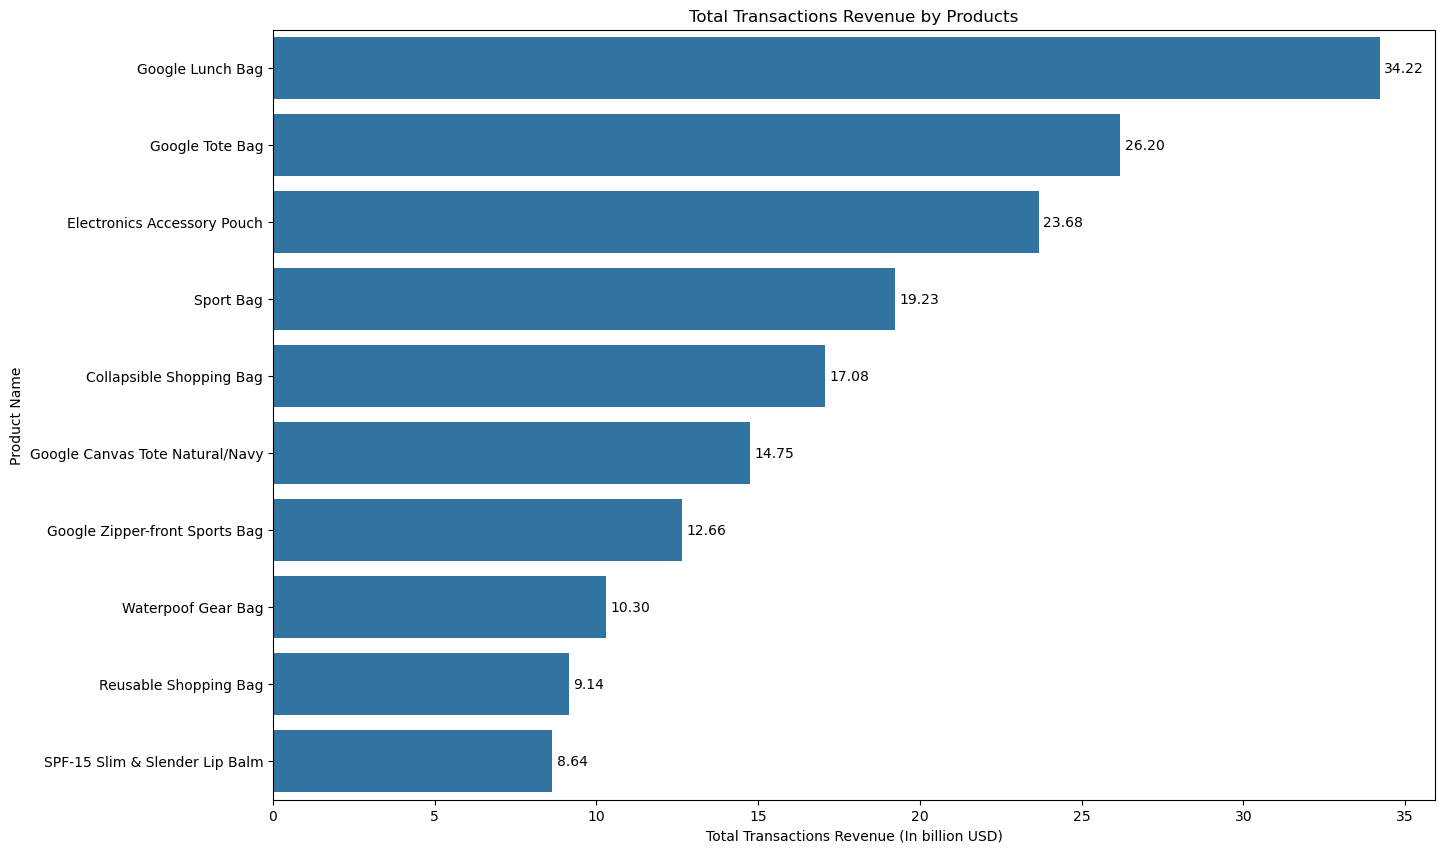

In [839]:
plt.figure(figsize=(15, 10))

# Membagi totalTransactionRevenue dengan nilai 1 miliar
product_revenue['totalTransactionRevenue_billion'] = product_revenue['totalTransactionRevenue'] / 1e9

# Membuat barplot Total Transactions Revenue by Products
ax = sns.barplot(data=product_revenue.head(10), x="totalTransactionRevenue_billion", y="productName", estimator="sum", errorbar=None)

# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10, color='black')

# Menyesuaikan title dan label kordinat
plt.title('Total Transactions Revenue by Products')
plt.xlabel('Total Transactions Revenue (In billion USD)')
plt.ylabel('Product Name')
plt.yticks(fontsize=10)

# Menampilkan plot
plt.show()


Insight :
1. Produk dengan total transaction revenue tertinggi adalah Google Lunch Bag dengan pendapatan sebesar 34,22 miliar USD, diikuti oleh Google Tote Bag, Electronics Accesory Pouch, Sport Bag, dll
2. Mayoritas produk yang menghasilkan total transaction revenue tertinggi adalah produk - produk yang masuk dalam kategori Bags. Kemungkinan hal ini disebabkan karena produk kategori Bags lebih fungsional dan memiliki nilai utilitas yang lebih tinggi sehingga lebih banyak demand nya

Karena produk - produk yang masuk kategori Bags mendominasi dalam hal total transactions revenue, maka disarankan perusahaan dapat memperbanyak kuantitas produk - produk tersebut di platform dan memberikan promosi spesial khusus produk - produk yang berkaitan dengan kategori Bags

#### Trend jumlah transaksi 10 produk dengan Total Transactions Revenue terbesar

Karena analisa ini merupakan analisa data series maka kita membutuhkan variable waktu yang sesuai. Month akan dijadikan variable waktu dalam menganalisa trend jumlah transaksi produk dengan tujuan agar visualisasi dapat lebih mudah untuk dimengerti

In [840]:
# Ekstrak month dari kolom date
dfc['month'] = dfc['date'].dt.month

# Membuat list column
col = list(dfc.columns)
col

['date',
 'fullVisitorId',
 'channelGrouping',
 'country',
 'city',
 'channelGrouping',
 'timeOnSite',
 'productName',
 'productCategory',
 'transactions',
 'totalTransactionRevenue',
 'pageTitle',
 'level_1',
 'month']

In [841]:
# Mengatur posisi column
dfc = dfc[['date',
 'month',
 'fullVisitorId',
 'country',
 'city',
 'productName',
 'productCategory',
 'transactions',
 'totalTransactionRevenue',
 'pageTitle']]

# Cek hasil
dfc

,date,month,fullVisitorId,country,city,productName,productCategory,transactions,totalTransactionRevenue,pageTitle
0,2016-08-01,8,4061386306679952654,United States,San Francisco,Latitudes Foldaway Shopper,Bags,1,113850000.0,Bags
1,2016-08-01,8,831511922986457407,United States,Chicago,Latitudes Foldaway Shopper,Bags,1,66900000.0,Bags
2,2016-08-01,8,831511922986457407,United States,Chicago,Speed Zone Air Mesh Tote,Bags,1,66900000.0,Bags
3,2016-08-01,8,6091498163535424271,United States,New York,Latitudes Foldaway Shopper,Bags,1,42910000.0,Bags
4,2016-08-01,8,8160942479431419810,United States,Austin,Chevron Shopper,Bags,1,108800000.0,Bags
...,...,...,...,...,...,...,...,...,...,...
757,2016-10-06,10,4636139656248532582,United States,New York,Electronics Accessory Pouch,Bags,1,111530000.0,Bags
758,2016-10-06,10,9218024446277360910,United States,New York,Seat Pack Organizer,Accessories,1,91950000.0,Fun
759,2016-10-06,10,62337808774510362,United States,New York,Large Zipper Top Tote Bag,Bags,1,502030000.0,Bags
760,2016-10-06,10,9218024446277360910,United States,New York,Google Kick Ball,Accessories,1,91950000.0,Fun


In [842]:
# Membuat dataframe baru yang menjumlahkan transsactions berdasarkan nama produk dan month
transactions_trend = dfc.groupby(['productName','month'])['transactions'].sum().reset_index()
transactions_trend = transactions_trend.sort_values(by='month', ascending=True).reset_index(drop=True)

In [843]:
# Cekk hasil
transactions_trend

,productName,month,transactions
0,Google Tote Bag,8,39
1,Google Canvas Tote Natural/Navy,8,44
2,Latitudes Foldaway Shopper,8,14
3,Google Zipper-front Sports Bag,8,10
4,Speed Zone Air Mesh Tote,8,15
...,...,...,...
58,Google Lunch Bag,10,1
59,Google Pet Feeding Mat,10,3
60,Windup Android,10,1
61,Electronics Accessory Pouch,10,1


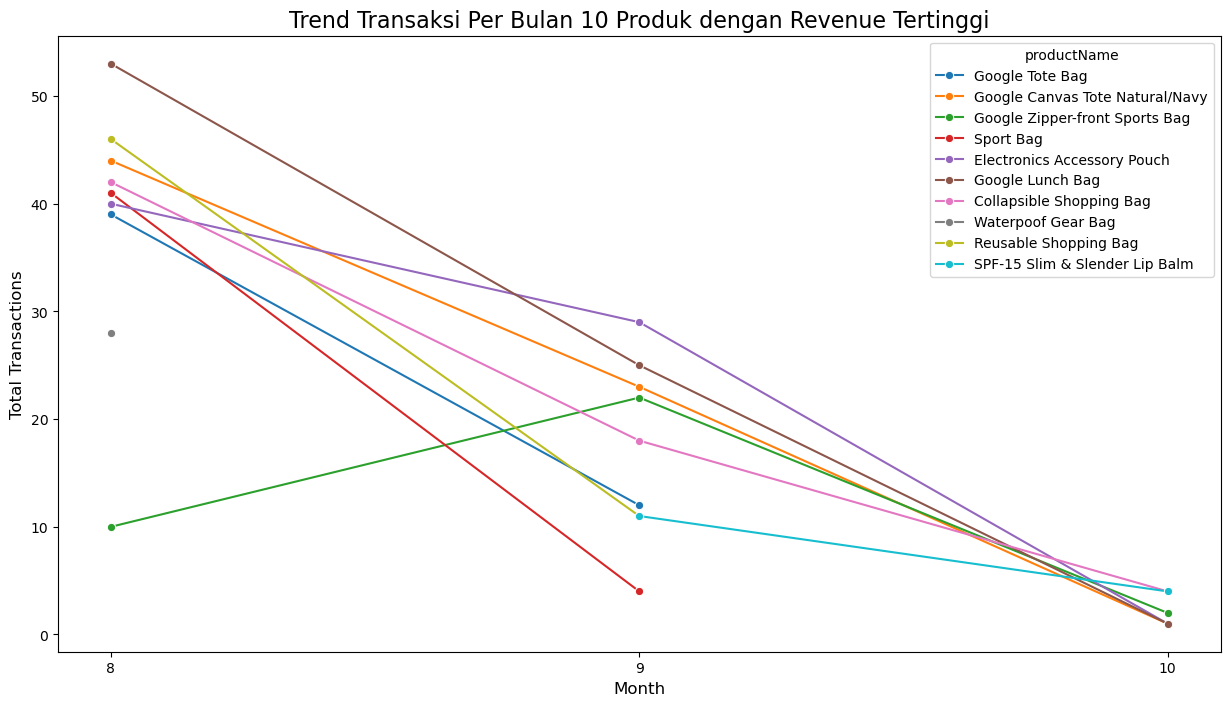

In [844]:
# Membuat line plot 
plt.figure(figsize=(15, 8))
sns.lineplot(data=transactions_trend[transactions_trend['productName'].isin(top_product)], 
             x='month', y='transactions', hue='productName', marker='o')

# Menambahkan title dan nama masing - masing kordinat/sumbu
plt.title('Trend Transaksi Per Bulan 10 Produk dengan Revenue Tertinggi', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

# Memastikan kordinat x hanya menampilkan nilai integer 
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


Mayoritas produk mengalami penurunan total transaction revenue dari bulan ke bulan (dari bulan Agustus hingga Oktober). Hal ini mengindikasikan bahwa ada faktor musiman yang mempengaruhi nilai total transaction revenue. Jika memang faktor musiman mempengaruhi total revenue dari masing - masing produk maka perusahaan disarankan untuk menyesuaikan strategi marketing pada bulan - bulan tersebut, contohnya adalah promosi spesial yang khusus dilakukan untuk merayakan hari libur pada bulan Agustus, September, atau Oktober. 


#### Kota penyumbang revenue terbesar

In [845]:
# Membuat dataframe baru yang menjumlahkan totaltransactionsrevenue berdasarkan kota dan negara
city_revenue = pd.DataFrame(dfc.groupby(['city', 'country'])['totalTransactionRevenue'].sum()).sort_values(by='totalTransactionRevenue', ascending=False).reset_index()

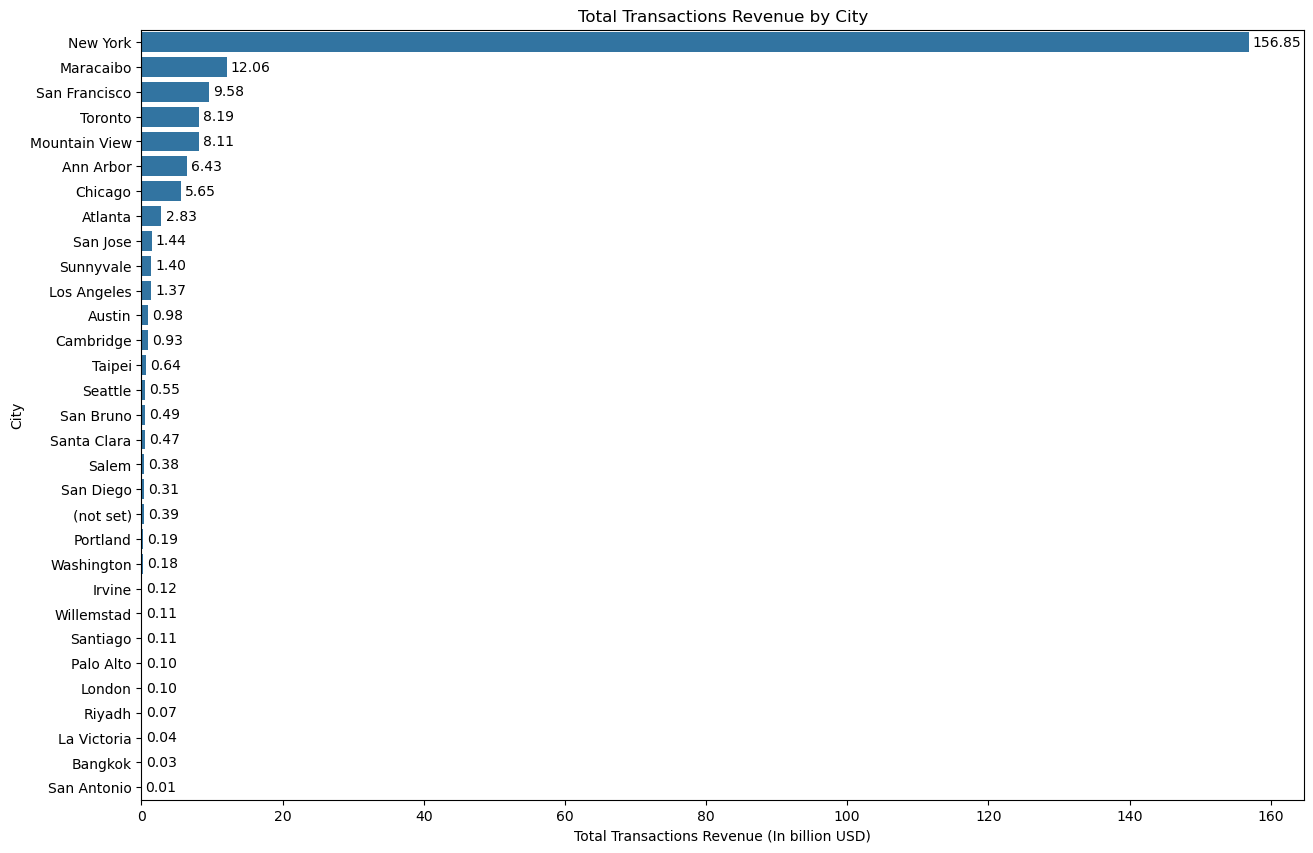

In [846]:
# Membuat horizontal barplot untuk menampilkan total rebenue by city
plt.figure(figsize=(15, 10))
city_revenue['totalTransactionRevenue_billion'] = city_revenue['totalTransactionRevenue'] / 1e9
ax = sns.barplot(city_revenue, x="totalTransactionRevenue_billion", y="city", estimator="sum", errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10, color='black')
plt.title('Total Transactions Revenue by City')
plt.xlabel('Total Transactions Revenue (In billion USD)')
plt.ylabel('City')
plt.yticks(fontsize=10)
plt.show()

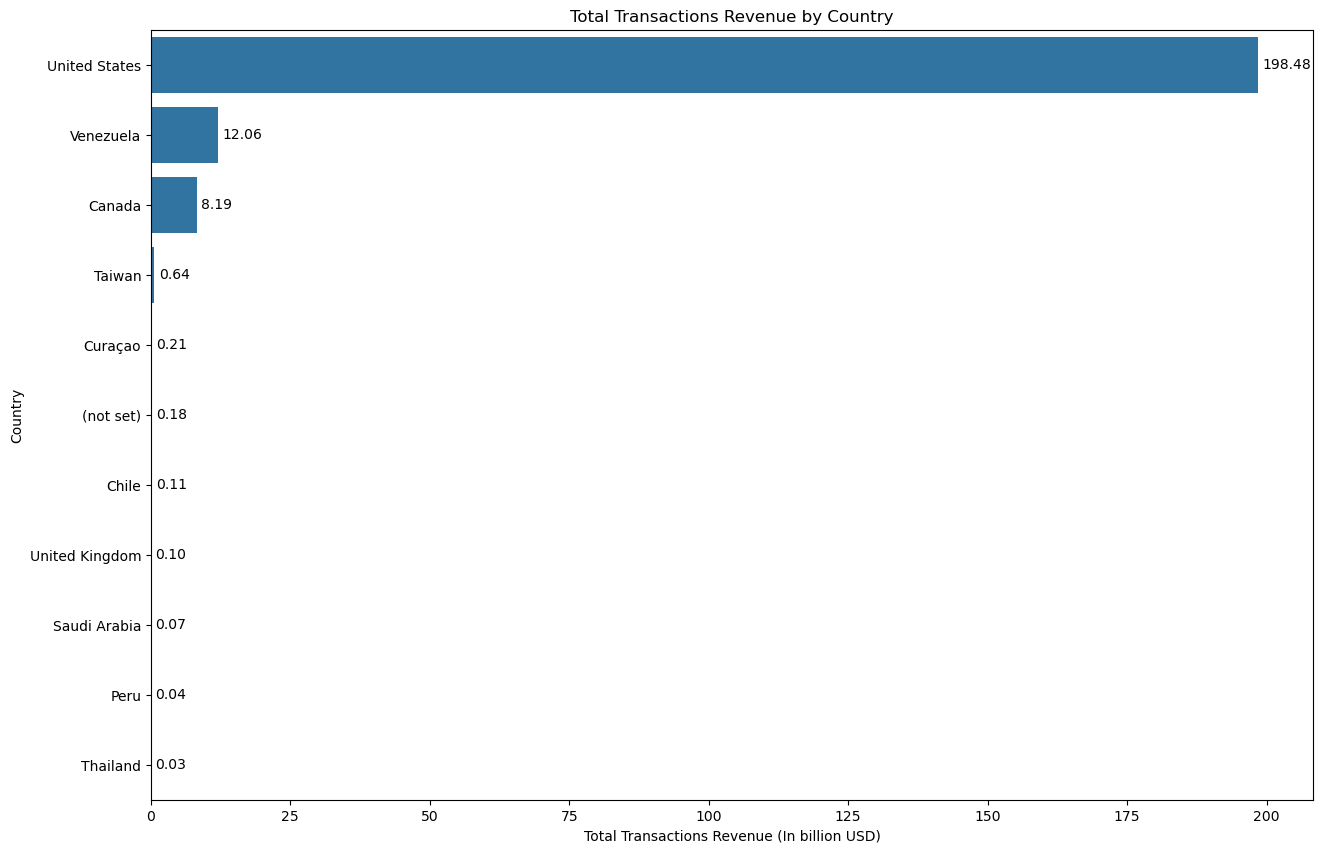

In [847]:
# Menampilkan horizontal barplot untuk menampilkan total revenue by country
plt.figure(figsize=(15, 10))
ax = sns.barplot(city_revenue, x="totalTransactionRevenue_billion", y="country", estimator="sum", errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10, color='black')
plt.title('Total Transactions Revenue by Country')
plt.xlabel('Total Transactions Revenue (In billion USD)')
plt.ylabel('Country')
plt.yticks(fontsize=10)
plt.show()

Insight :
1. Platform sudah memiliki penetrasi yang sangat kuat di United States dengan total revenue 198.48 miliar USD. Hal ini menunjukan bahwa United States menjadi pasar utama 
2. Dengan revenue 156.85 miliar, New York menjadi kota dengan kontribusi revenue terbesar. Hal ini mengindikasikan tingginya aktivitas belanja online di New York
3. Maracaibo menjadi kota dengan total revenue terbesar kedua setelah New York. Hal ini menunjukkan potensi yang besar dalam mengembangkan bisnis ini di Venezuela
4. Platform ini sudah memiliki basis yang sangat kuat di United States terutama di New York. Namun platform ini juga menunjukan keberhasilan dalam menjangkau pasar yang lebih luas (global)

#### Distribusi transaksi berdasarkan channel group

In [848]:
channel = df[['fullVisitorId','channelGrouping']]

# Memasukan kolom channelGroup
dfc= dfc.merge(channel, on= 'fullVisitorId', how='left', suffixes=('','_channel'))

# Drop duplicated rows
dfc = dfc.drop_duplicates().reset_index(drop=True)

In [849]:
dfc['totalTransactionRevenue'].skew()

5.113740398624197

C:\Users\Fiqih\AppData\Local\Temp\ipykernel_25836\1283329995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfc, x='channelGrouping', y='transactions', ax=axs[0], palette='deep', estimator='sum', errorbar=None)
C:\Users\Fiqih\AppData\Local\Temp\ipykernel_25836\1283329995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfc, x='channelGrouping', y=dfc['totalTransactionRevenue'] / 1e9, ax=axs[1], palette='deep', estimator='median', errorbar=None)


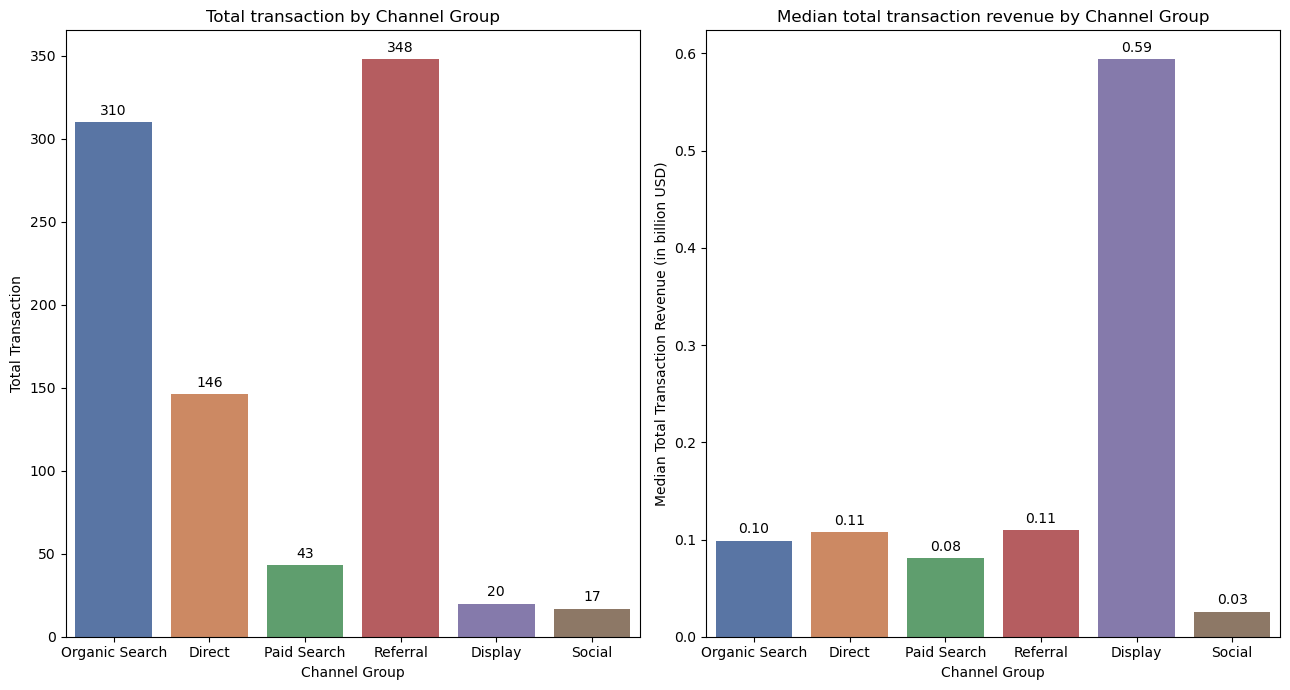

In [850]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

# Membuat barplot untuk total transaksi berdasarkan Channel Group
sns.barplot(data=dfc, x='channelGrouping', y='transactions', ax=axs[0], palette='deep', estimator='sum', errorbar=None)
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

axs[0].set_title('Total transaction by Channel Group')
axs[0].set_xlabel('Channel Group')
axs[0].set_ylabel('Total Transaction')

# Membuat barplot untuk median total transaction revenue berdasarkan Channel Group
sns.barplot(data=dfc, x='channelGrouping', y=dfc['totalTransactionRevenue'] / 1e9, ax=axs[1], palette='deep', estimator='median', errorbar=None)
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10, color='black')

axs[1].set_title('Median total transaction revenue by Channel Group')
axs[1].set_xlabel('Channel Group')
axs[1].set_ylabel('Median Total Transaction Revenue (in billion USD)')

# Menampilkan plot
plt.tight_layout()
plt.show()


Insight :
1. User yang menuju ke platform dari channel Referral memiliki total transaksi tertinggi (348), namun nilai median revenuenya tidak terlalung tinggi dibandingkan channel Display
2. Channel Social menunjukkan performa terendah, baik dalam jumlah transaksi (17) maupun nilai median revenue (0.03 billion USD). Hal ini mengindikasikan performa marketing yang kurang baik dalam memasarkan produk di social media
3. User yang melakukan transaksi karena Display ads menghasilkan nilai revenue tertinggi meski volumenya rendah

#### Analisa user behavior

In [851]:
session = df[['fullVisitorId','timeOnSite', 'pageviews']]

# Memasukan kolom channelGroup
dfc= dfc.merge(session, on= 'fullVisitorId', how='left', suffixes=('','_session'))

# Drop duplicated rows
dfc = dfc.drop_duplicates().reset_index(drop=True)

dfc['timeOnSite'] = dfc['timeOnSite']/60

C:\Users\Fiqih\AppData\Local\Temp\ipykernel_25836\44988136.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dfc, x="timeOnSite", hue="transactions", multiple="stack", ax=axs[0])
C:\Users\Fiqih\AppData\Local\Temp\ipykernel_25836\44988136.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dfc, x="pageviews", hue="transactions", multiple="stack", ax=axs[1])


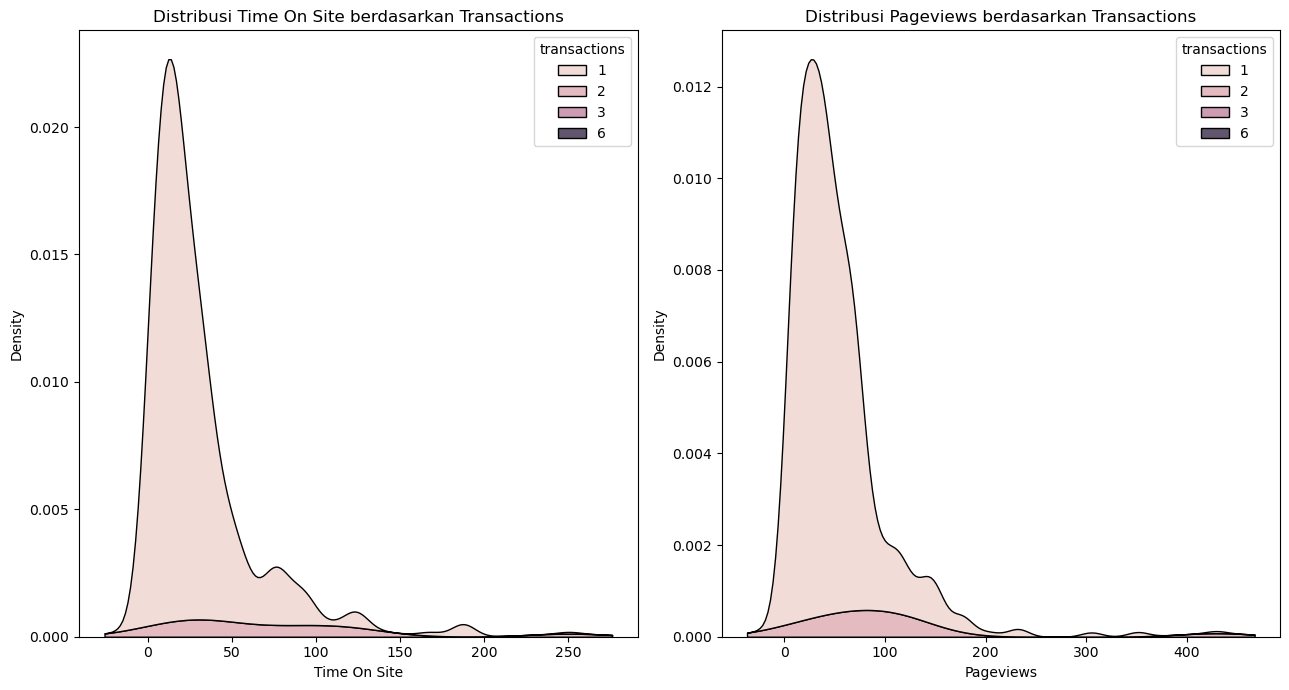

In [852]:
# Membuat subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

# Membuat KDE plot untuk distribusi timeOnSite dengan hue berdasarkan transactions
sns.kdeplot(data=dfc, x="timeOnSite", hue="transactions", multiple="stack", ax=axs[0])
axs[0].set_title('Distribusi Time On Site berdasarkan Transactions')
axs[0].set_xlabel('Time On Site')
axs[0].set_ylabel('Density')

# Membuat KDE plot untuk distribusi pageviews dengan hue berdasarkan transactions
sns.kdeplot(data=dfc, x="pageviews", hue="transactions", multiple="stack", ax=axs[1])
axs[1].set_title('Distribusi Pageviews berdasarkan Transactions')
axs[1].set_xlabel('Pageviews')
axs[1].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()
plt.show()



Insight :
1. Mayoritas user menghabiskan waktu relatif singkat di situs platform dan user yang melakukan lebih banyak transaksi cenderung menghabiskan waktu lebih lama di situs. Meskipun begitu, mayoritas transaksi dilakukan oleh user yang menghabiskan waktu di situs platform antara 1 - 50 detik
2. User dengan 1 transaksi memiliki distribusi terbesar, menunjukkan bahwa sebagian besar user adalah pembeli satu kali
3. User dengan jumlah transaksi 2, 3, 6 menunjukkan pola engagement yang lebih tinggi baik dalam time on site maupun pageviews
4. Ada kelompok user yang cepat memutuskan dalam membeli sesuatu (waktu singkat, sedikit pageviews) dan kelompok user yang lebih eksploratif (menghabiskan  waktu yang lebih lama di situs dan melihat lebih banyak pageviews)